<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Пропуски:" data-toc-modified-id="Пропуски:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски:</a></span></li><li><span><a href="#Дубликаты:" data-toc-modified-id="Дубликаты:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дубликаты:</a></span></li><li><span><a href="#График-подсчета:" data-toc-modified-id="График-подсчета:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>График подсчета:</a></span></li><li><span><a href="#Мини-вывод:" data-toc-modified-id="Мини-вывод:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Мини-вывод:</a></span></li><li><span><a href="#Изменение-весов-в-модели-обучения." data-toc-modified-id="Изменение-весов-в-модели-обучения.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Изменение весов в модели обучения.</a></span></li><li><span><a href="#Ресемплирование-с-уменьшением-класса-0." data-toc-modified-id="Ресемплирование-с-уменьшением-класса-0.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Ресемплирование с уменьшением класса 0.</a></span></li><li><span><a href="#AUC-ROC:" data-toc-modified-id="AUC-ROC:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>AUC-ROC:</a></span></li><li><span><a href="#Вывод-по-первой-главе:" data-toc-modified-id="Вывод-по-первой-главе:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Вывод по первой главе:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier:" data-toc-modified-id="DecisionTreeClassifier:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTreeClassifier:</a></span></li><li><span><a href="#LogisticRegression:" data-toc-modified-id="LogisticRegression:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression:</a></span></li><li><span><a href="#SGDClassifier:" data-toc-modified-id="SGDClassifier:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SGDClassifier:</a></span></li><li><span><a href="#CatBoostClassifier:" data-toc-modified-id="CatBoostClassifier:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Итоговый-вывод:" data-toc-modified-id="Итоговый-вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Итоговый вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. 
     
    
 

<div class="alert alert-warning">


Совет: 
   
Вопросик, при желании можешь ответить )
    
    
- а почему по твоему была выбрана метрика f1? 
    
    
- а что если бы нам было нужно найти как можно больше токсичных комментариев, в этом случаи на какую метрику мы бы ориентировались?
    
    
- каким образом мы можем изменить функцию ошибки в модели, чтобы она максимизировала интересующую нас метрику (accuracy, f1, precision, roc-auc итп)?    



</div>

## Подготовка

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords as nltk_stopwords
import re
from pymystem3 import Mystem
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem import WordNetLemmatizer 
from sklearn.utils import shuffle
from nltk.corpus import wordnet
pd.set_option('display.max_colwidth', 1000)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/datasets/toxic_comments.csv')

Импортировали данные. Посмотрим на них. Исправим ошибки, если они есть.

In [ ]:
data.sample(5)

,Unnamed: 0,text,toxic
55461,55522,"""UN Civil not IN civil. \nCongrats. You are very powerful. Being a PhD student you should know that its okay to use material from other sources as long as you cite the source. Being a PhD student you should also know what, when, how and where to cite. Your definition of vandalism seems to be """"Anybody who does not agree with me or obey me is a Vandal."""" Also, I find your interest in Students Islamic Organization of India to be fascinating. As an Indian, I wonder how many Pakistanis are interested in SIO. \nI am surprised to learn from your website that you attend Urbana-Champaign and have attended BUET. I used to have a lot of respect for these universities. As a grad student, I am also surprised to learn that you are actually on the program committee of a conference. But then again, I really am not. I have been in grad school long enough to know that people like you are perfect for academia. You will do well. Goodbye. Lets hope our paths dont cross again.\n\n""",0
77343,77419,"(UTC)\nQuasi turbine steam engine\nFirstly, the Quasiturbine is a steam engine. It WORKS. It goes. Will those editors who vandalize, that is the correct word, on their own POV, when references are given, please desist. 188.223.226.180 10:14, 24 March 2013",0
89012,89095,"Support split. I'd tried condensing it but it's rather tedious work, so couldn't promise to finish the job any time soon. Chopping into manageable portions might make condensing (which will still be necessary) less of an ordeal.",0
139602,139754,"""\nThe more I think about it, the more I think """"we"""" is the right wording. The problem is that the object of the sentence is """"Penn"""" and without knowing that he said, """"they"""" you're expecting him to use a first person singular, not a first person plural. I think the reason it feels awkward is that when it undergoes the transformation from singular to plural it does become slightly more ambiguous, because """"we"""" refers to a group of people, but only one that includes Penn, which means it's either Penn & Teller or the entire production staff of the show. When you go to """"they"""", it could be any group of people, and because it doesn't say """"he"""", you sort of need to think about what other possible groups Penn could be referring to. Obviously it only takes a few milliseconds to figure out what it means, but if you're reading along at full speed it can break the flow to have that happen.\n\nRegarding the colon wording (Penn said: """"the aim of the show is to ..""""), I understand what ...",0
70823,70893,Yad Vashem|title= Wiktor Brillant Memorial Page,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


### Пропуски:

In [ ]:
display(f'Количество пропусков в столбце "text" в датасете: {data.isna().sum()[0]}')

'Количество пропусков в столбце "text" в датасете: 0'

In [ ]:
display(f'Количество пропусков в столбце "toxic" в датасете: {data.isna().sum()[1]}')

'Количество пропусков в столбце "toxic" в датасете: 0'

### Дубликаты:

In [ ]:
display(f'Количество дубликатов в столбцах в датасете: {data.duplicated().sum()}')

'Количество дубликатов в столбцах в датасете: 0'

In [ ]:
display(f'Количество дубликатов в индексах в датасете: {data.index.duplicated().sum()}')

'Количество дубликатов в индексах в датасете: 0'

### График подсчета:

<AxesSubplot:xlabel='toxic', ylabel='count'>

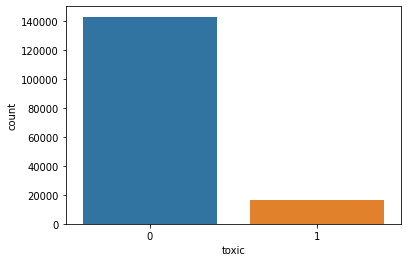

In [ ]:
sns.countplot(data['toxic'])

In [ ]:
class_ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]
class_ratio

8.841344371679229

### Мини-вывод:

- Импортировали данные, посмотрели info.
- Проверили датасет на пропуски, поняли, что пропусков нет.
- Проверили датасет на дубликаты в индексах и столбцах - пропусков нет.
- Увидели соотношение положительных и отрицательных твитов. Довольно сильная разница. Классы несбалансированны. Отрицательных комментариев больше почти в 9 раз.

Довольно много токсичных комментариев, относительно положительных комментариев. Разница почти в 9 раз. Проведем поиск лучшего способа балансировки и сравним качество, c помощью: 
- Изменение весов в модели обучения.
- Ресемплирование с уменьшением класса 0.

Upsampling не будем использовать из-за громоздкого набора данных.

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def lemmatize_text(text):
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    lemm_text = "".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())

data['lemm_text'] = data['text'].apply(lemmatize_text)

data = data.drop(['text'], axis=1)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/home/jovyan/nltk_data'
    - '/opt/conda/nltk_data'
    - '/opt/conda/share/nltk_data'
    - '/opt/conda/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
data.head()

,toxic,lemm_text
0,0,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now
1,0,d aww he matches this background colour i m seemingly stuck with thanks talk january utc
2,0,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info
3,0,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominationstransport
4,0,you sir are my hero any chance you remember what page that s on


Разобьем выборку по отношению 60/20/20. 

In [ ]:
target = data['toxic']
features = data.drop(['toxic'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train = count_tf_idf.fit_transform(features_train['lemm_text'])
features_valid = count_tf_idf.transform(features_valid['lemm_text'])
features_test = count_tf_idf.transform(features_test['lemm_text'])
display(f'Размер обучающей выборки: {features_train.shape}')
display(f'Размер валидационной выборки: {features_valid.shape}')
display(f'Размер тестовой выборки: {features_test.shape}')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Размер обучающей выборки: (95742, 126482)'

'Размер валидационной выборки: (31914, 126482)'

'Размер тестовой выборки: (31915, 126482)'

Посмотрим на значение f1 без балансировки, а потом сравним с сбалансированными данными.

In [ ]:
model = LogisticRegression()
score_f1 = cross_val_score(model, 
                      features_train, 
                      target_train, 
                      cv=3, 
                      scoring='f1').mean()
display(f'F1 на CV: {score_f1}')

'F1 на CV: 0.6732751694870752'

### Изменение весов в модели обучения.

In [ ]:
dict_classes={0:1, 1:class_ratio}
model_LR = LogisticRegression(class_weight = dict_classes)
train_f1_ballanced = cross_val_score(
    model_LR, features_train, target_train, cv=3, scoring='f1').mean()
display(f'F1 на CV с балансированными классами: {train_f1_ballanced}')

'F1 на CV с балансированными классами: 0.751508005539078'

In [ ]:
model_LR = LogisticRegression(class_weight='balanced')
train_f1_balanced = cross_val_score(
    model_LR, features_train, target_train, cv=3, scoring='f1').mean()
display(f'F1 на CV с балансированными классами: {train_f1_ballanced}')

'F1 на CV с балансированными классами: 0.751508005539078'

На обучающей выборке F1-мера увеличилась.

### Ресемплирование с уменьшением класса 0.

Уровняем значения с классом 0 с значениями с классом 1.

In [ ]:
data_train = data.iloc[target_train.index]

target_train_zero = data_train[data_train['toxic'] == 0]['toxic']
target_train_one = data_train[data_train['toxic'] == 1]['toxic']

In [ ]:
target_train_zero_downsample = target_train_zero.sample(target_train_one.shape[0], random_state=12345)
target_train_downsample = pd.concat([target_train_zero_downsample, target_train_one])

features_train_downsample = data.iloc[target_train_downsample.index]
features_train_downsample, target_train_downsample = shuffle(
    features_train_downsample, target_train_downsample, random_state=12345)
features_train_downsample = count_tf_idf.transform(
    features_train_downsample['lemm_text'].values.astype('U'))

In [ ]:
model_LR = LogisticRegression()
f1_downsampled = cross_val_score(
    model_LR, features_train_downsample, target_train_downsample, cv=3, scoring='f1').mean()
display(f'F1 на CV с уменьшением классов: {f1_downsampled}')

NameError: name 'classificator' is not defined

На обучающей выборке заметно F1-мера увеличилась.

### AUC-ROC:

Построим ROC-AUC графики и на основе этого выберем,какой метод балансировки будет наилучшим.

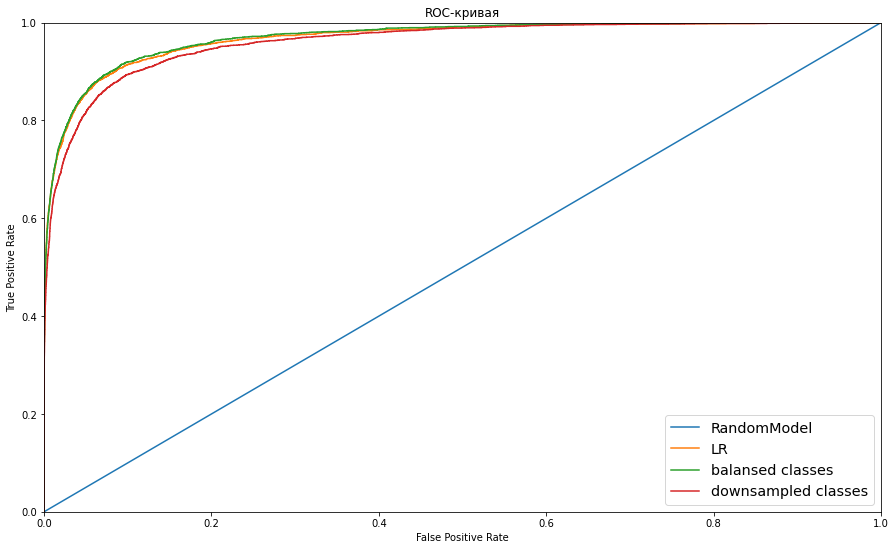

In [ ]:
plt.figure(figsize=(15,9))

plt.plot([0, 1], [0, 1], linestyle='-', label='RandomModel')


model_LR = LogisticRegression()
model_LR.fit(features_train, target_train)
probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
pred = model_LR.predict(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1 = f1_score(target_valid, pred)
plt.plot(fpr, tpr, label='LR')

model_LR = LogisticRegression(class_weight=dict_classes)
model_LR.fit(features_train, target_train)
probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
pred = model_LR.predict(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_balanced = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_balanced = f1_score(target_valid, pred)
plt.plot(fpr, tpr, label='balansed classes')

model_LR = LogisticRegression()
model_LR.fit(features_train_downsample,target_train_downsample)
probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
pred = model_LR.predict(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc_downsampled = roc_auc_score(target_valid, probabilities_one_valid)
valid_f1_downsampled = f1_score(target_valid, pred)
plt.plot(fpr, tpr, label='downsampled classes')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Вывод по первой главе:

Помимо выше написанного мини-вывода, добавлю еще немного слов о том, что сделал в этой главе.

Сначала мы заметили, что класс 0 намного больше, чем класс 1, поэтому было принято решение сбалансировать классы. Для этого мы решили использовать изменение весов в модели обучения, downsampling и upsampling.

После балансировки классов, для обнаружения лучшего способа балансировки был построен график ROC-кривой. Из нее можно увидеть, что наиболее подходящими показателями F1 и AUC-ROC обладает классификатор, где учтен вес классов. Поэтому, в дальнейшем будем использовать этот метод балансировки.

## Обучение

Для обучения выберем следующие модели:

$1) DecisionTreeClassifier$

$2) LogisticRegression$

$3) SGDClassifier$

$4) CatBoostClassifier$

### DecisionTreeClassifier:

In [ ]:
model_tree = DecisionTreeClassifier(random_state=12345)

model_tree_parametrs = {'max_depth': range(1, 20),
                       'class_weight': [dict_classes]}
model_tree_grid = GridSearchCV(model_tree, model_tree_parametrs, scoring='f1', cv=3, verbose=10)
model_tree_grid.fit(features_train, target_train)
tree_best_params = model_tree_grid.best_params_

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV 1/3; 1/19] START class_weight={0: 1, 1: 8.834884437596301}, max_depth=1.....
[CV 1/3; 1/19] END class_weight={0: 1, 1: 8.834884437596301}, max_depth=1; total time=   3.2s
[CV 2/3; 1/19] START class_weight={0: 1, 1: 8.834884437596301}, max_depth=1.....
[CV 2/3; 1/19] END class_weight={0: 1, 1: 8.834884437596301}, max_depth=1; total time=   3.2s
[CV 3/3; 1/19] START class_weight={0: 1, 1: 8.834884437596301}, max_depth=1.....
[CV 3/3; 1/19] END class_weight={0: 1, 1: 8.834884437596301}, max_depth=1; total time=   3.4s
[CV 1/3; 2/19] START class_weight={0: 1, 1: 8.834884437596301}, max_depth=2.....
[CV 1/3; 2/19] END class_weight={0: 1, 1: 8.834884437596301}, max_depth=2; total time=   3.4s
[CV 2/3; 2/19] START class_weight={0: 1, 1: 8.834884437596301}, max_depth=2.....
[CV 2/3; 2/19] END class_weight={0: 1, 1: 8.834884437596301}, max_depth=2; total time=   3.3s
[CV 3/3; 2/19] START class_weight={0: 1, 1: 8.834884437596301}, 

In [ ]:
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.set_params(**tree_best_params)
model_tree.fit(features_train, target_train)
predict = model_tree.predict(features_valid)
valid_f1_tree = f1_score(target_valid, predict)
display(f'F1: {valid_f1_tree}')

'F1: 0.6013936037162766'

### LogisticRegression:

In [ ]:
model_LR = LogisticRegression()
model_LR_parametrs = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                    'C': [0.1, 1, 10],
                    'class_weight': [dict_classes]}]

model_LR_grid = GridSearchCV(model_LR, model_LR_parametrs, scoring='f1', cv=3)
model_LR_grid.fit(features_train, target_train)
LR_best_params = model_LR_grid.best_params_

In [ ]:
model_LR = LogisticRegression()
model_LR.set_params(**LR_best_params)
model_LR.fit(features_train, target_train)
predict = model_LR.predict(features_valid)
valid_f1_LR = f1_score(target_valid, predict)
display(f'F1: {valid_f1_LR}')

'F1: 0.7676588183029764'

Значение F1-меры значительно увеличилось.

### SGDClassifier:


In [ ]:
model_sgdc = SGDClassifier(random_state=12345)
model_sgdc_parametrs = [{'loss':['hinge', 'log', 'modified_huber'],
                        'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
                        'eta0':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                        'class_weight': [dict_classes]}]


model_sgdc_grid = GridSearchCV(model_sgdc, model_sgdc_parametrs, scoring='f1',cv=3)
model_sgdc_grid.fit(features_train, target_train)
model_sgdc_params = model_sgdc_grid.best_params_

In [ ]:
model_sgdc = SGDClassifier()
model_sgdc.set_params(**model_sgdc_params)
model_sgdc.fit(features_train, target_train)
predict = model_sgdc.predict(features_valid)
f1_SGDC = f1_score(target_valid, predict)
display(f'F1 на валидации: {f1_SGDC}')

'F1 на валидации: 0.7641205325858444'

### CatBoostClassifier:

In [ ]:
model_cb = CatBoostClassifier(verbose=False, iterations=200)
model_cb.fit(features_train, target_train)
model_cb_parametrs = {'depth': range(1, 6, 2),
                    'learning_rate' : [0.1]}

model_cb_grid = GridSearchCV(model_cb, model_cb_parametrs, scoring='f1', cv=3, verbose=10)
model_cb_grid.fit(features_train, target_train)
model_cb_params = model_cb_grid.best_params_


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START depth=1, learning_rate=0.1..................................
[CV 1/3; 1/3] END ................depth=1, learning_rate=0.1; total time= 1.1min
[CV 2/3; 1/3] START depth=1, learning_rate=0.1..................................
[CV 2/3; 1/3] END ................depth=1, learning_rate=0.1; total time= 1.2min
[CV 3/3; 1/3] START depth=1, learning_rate=0.1..................................
[CV 3/3; 1/3] END ................depth=1, learning_rate=0.1; total time= 1.2min
[CV 1/3; 2/3] START depth=3, learning_rate=0.1..................................
[CV 1/3; 2/3] END ................depth=3, learning_rate=0.1; total time= 2.2min
[CV 2/3; 2/3] START depth=3, learning_rate=0.1..................................
[CV 2/3; 2/3] END ................depth=3, learning_rate=0.1; total time= 2.2min
[CV 3/3; 2/3] START depth=3, learning_rate=0.1..................................
[CV 3/3; 2/3] END ................depth=3, learnin

In [ ]:
model_cb = CatBoostClassifier(verbose=False, iterations=200)
model_cb.set_params(**model_cb_params)
model_cb.fit(features_train, target_train)
predict = model_cb.predict(features_valid)
valid_f1_cb = f1_score(target_valid, predict)
display(f'F1: {valid_f1_cb}')

'F1: 0.685091475282211'

### Вывод:

В этой главе мы протестировали 4 разных модели,а именно DecisionTreeClassifier, LogisticRegression, SGDClassifier, CatBoostClassifier, на валидационной выборке. Сначала мы нашли для них наилучшие гиперпараметры, а позже посчитали для них f1-меру. С задачей,а именно f1 > 0.75 справились только две модели: SGDClassifier и LogisticRegression. Их мы и будем использовать в дальнейшем на тестовой выборке.

## Выводы

Построем такой же график ROC-кривой, как в пункте 1.7, но уже для двух моделей: SGDClassifier и LogisticRegression

'Метрики LogisticRegression'

'ROC_AUC :0.9644859975874468'

'F1-мера :0.7646619907476495'

'Метрики SGDClassifier'

'ROC AUC: 0.9691380413389833'

'F1: 0.7569542006181512'

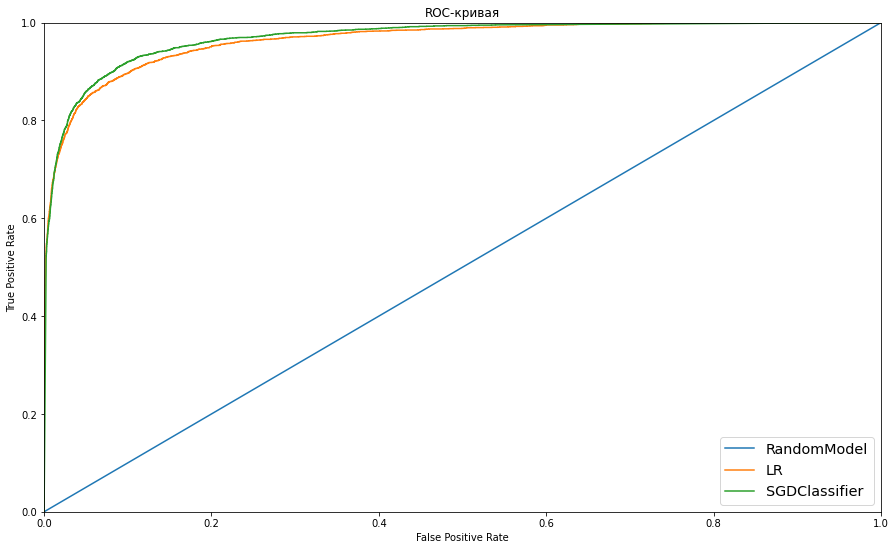

In [ ]:
plt.figure(figsize=(15,9))

plt.plot([0, 1], [0, 1], linestyle='-', label='RandomModel')


model_LR = LogisticRegression()
model_LR.set_params(**LR_best_params)
model_LR.fit(features_train, target_train)
probabilities_test = model_LR.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
pred = model_LR.predict(features_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
display('Метрики LogisticRegression')
display(f'ROC_AUC :{roc_auc_score(target_test, probabilities_one_test)}')
display(f'F1-мера :{f1_score(target_test, pred)}')
plt.plot(fpr, tpr, label='LR')

model_sgdc = SGDClassifier()
model_sgdc.set_params(**model_sgdc_params)
model_sgdc.fit(features_train, target_train)
probabilities_test = model_sgdc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = model_sgdc.predict(features_test)
plt.plot(fpr, tpr, label='SGDClassifier')
display('Метрики SGDClassifier')
display(f'ROC AUC: {roc_auc_score(target_test, probabilities_one_test)}')
display(f'F1: {f1_score(target_test, predict_test)}')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Итоговый вывод:

В рамках проекта для интернет-магазин «Викишоп»,который запускает новый сервис, где теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. Магазину понадобился инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Для того, чтобы справиться с этой задачей мы сначала импортировали данные и проверили первичный анализ, т.е проверили на пропуски и дубликаты, таковых не нашлось. Дальше я решил обратить внимание на классы, для этого использовал countplot из seaborn. На графике было видно, что отрицательных комментариев ГОРАЗДО больше, чем положительных. Я решил узнать какова разница. Разница составила - 8.83, т.е положительных комментариев почти в 9 раз меньше, чем отрицательных. После обнаружения данной проблемы я начал бороться с дисбалансом. После успешной борьбы с дисбалансом, я перешел к обучению моделей. Для обучения были выбраны 4 модели: DecisionTreeClassifier, LogisticRegression, SGDClassifier, CatBoostClassifier. После обучения и тестирования лучше всех себя показала модель LogisticRegression. Её и рекомендуется использовать для работы.